In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint

%matplotlib inline

Using TensorFlow backend.


In [2]:
NUM_CLASSES = 2
FRAC_TRAIN = .9
IMG_X = 50
IMG_Y = 50
SAVE_PATH = 'hand_gesture.h5'

Read data from csv

In [3]:
data = pd.read_csv('train.csv', header=None)
total_samples = data.shape[0]
num_train = int(total_samples * FRAC_TRAIN)
data.shape

(2000, 2501)

Randomly shuffle the dataset

In [4]:
data = np.array(data)
np.random.shuffle(data)

First column is the target variable

In [15]:
X = data[:, 1:] / 255.
y = data[:, 0].reshape(-1, 1)
X_train, X_test = X[:num_train, :], X[num_train:, :]
y_train, y_test = y[:num_train, :], y[num_train:, :]

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (1800, 2500)
y_train shape: (1800, 1)
X_test shape: (200, 2500)
y_test shape: (200, 1)


Reshape X to size of image (50x50)

In [18]:
X_train, X_test = X_train.reshape(-1, IMG_X, IMG_Y, 1), X_test.reshape(-1, IMG_X, IMG_Y, 1)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (1800, 50, 50, 1)
X_test shape: (200, 50, 50, 1)


Create model

In [19]:
model = Sequential()

model.add(Conv2D(32, (5, 5), input_shape=(IMG_X, IMG_Y, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(5, 5), strides=(5, 5), padding='same'))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.6))

model.add(Dense(1, activation='sigmoid'))

In [20]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
checkpoint1 = ModelCheckpoint(SAVE_PATH, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
checkpoint2 = ModelCheckpoint(SAVE_PATH, monitor='acc', verbose=1, save_best_only=True, mode='max')
callbacks = [checkpoint1, checkpoint2]

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 46, 46, 32)        832       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 19, 19, 64)        51264     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
__________

In [22]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64, callbacks=callbacks)

Train on 1800 samples, validate on 200 samples
Epoch 1/10
1800/1800 [==============================] - 13s 7ms/step - loss: 0.1017 - acc: 0.9561 - val_loss: 6.1558e-06 - val_acc: 1.0000

Epoch 00001: val_acc improved from -inf to 1.00000, saving model to hand_gesture.h5

Epoch 00001: acc improved from -inf to 0.95611, saving model to hand_gesture.h5
Epoch 2/10
1800/1800 [==============================] - 12s 6ms/step - loss: 8.7622e-06 - acc: 1.0000 - val_loss: 3.7816e-07 - val_acc: 1.0000

Epoch 00002: val_acc did not improve from 1.00000

Epoch 00002: acc improved from 0.95611 to 1.00000, saving model to hand_gesture.h5
Epoch 3/10
1800/1800 [==============================] - 12s 6ms/step - loss: 9.7926e-07 - acc: 1.0000 - val_loss: 2.9252e-07 - val_acc: 1.0000

Epoch 00003: val_acc did not improve from 1.00000

Epoch 00003: acc did not improve from 1.00000
Epoch 4/10
1800/1800 [==============================] - 12s 6ms/step - loss: 2.3871e-06 - acc: 1.0000 - val_loss: 2.4261e-07 - va

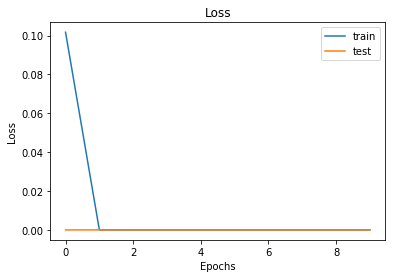

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'test'])

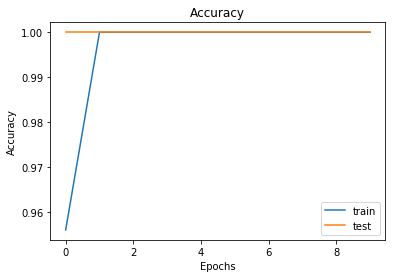

In [24]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])

In [25]:
model.save(SAVE_PATH)

---

### Predict

In [26]:
import random
from keras.models import load_model
from imageio import imread
from matplotlib.pyplot import imshow

model = load_model(SAVE_PATH)

In [40]:
def predict(image_path):
    im = imread(image_path)
    imshow(im, cmap=plt.cm.gray)
    im = im.reshape(1, 50, 50, 1)
    pred = model.predict(im)
    print('Predicted class:', int(pred[0][0]))

Predicted class: 0


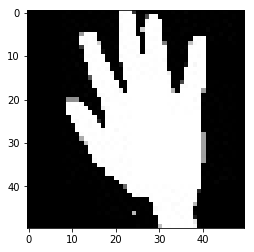

In [43]:
img = random.randint(0, 999)
predict(f'./gestures/0/{img}.jpg')

Predicted class: 1


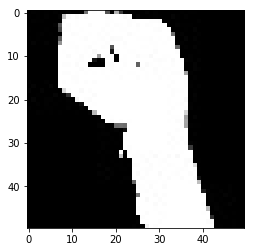

In [46]:
img = random.randint(0, 999)
predict(f'./gestures/1/{img}.jpg')